In [7]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
import pickle
with open('train_bow.pickle', 'rb') as f:
    x_bow=pickle.load(f)
with open('test_bow.pickle','rb') as f:
    test_bow=pickle.load(f)

In [3]:
#loading y_train and y_test dataset
with open('y_train.pickle', 'rb') as f:
    y_bow=pickle.load(f)
with open('y_test.pickle','rb') as f:
    y_test=pickle.load(f)

In [4]:
from sklearn.preprocessing import normalize
x_bow=normalize(x_bow,axis=0)
test_bow=normalize(test_bow,axis=0)

In [16]:
from sklearn.cluster import KMeans
k_set=[3,5,7,10,15,20]
#inertia_set=[]
loss=[]
for k in k_set:
    kmeans=KMeans(k)
    kmeans=kmeans.fit(x_bow)
    loss.append(kmeans.inertia_)
    #inertia_set.append(kmeans.inertia_)

Text(0.5,1,'Elbow method Plot for kMeans')

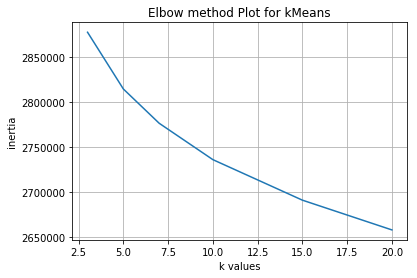

In [19]:
plt.plot(k_set,inertia_set)
plt.xlabel('k values')
plt.ylabel('inertia')
plt.grid()
plt.title('Elbow method Plot for kMeans')

In [21]:
#for finding the optimal k
optimal_k = k_set[loss.index(min(loss))]
print(optimal_k)
print(min(loss))

20
2657787.2728719465


<h3>Wordclouds of clusters obtained after applying k-means on BOW</h3>

In [8]:
#feature importance
with open('bow_features.pickle','rb') as f:
    bow_features=pickle.load(f)

In [6]:
from sklearn.cluster import KMeans
kmeans=KMeans(20)
kmeans=kmeans.fit(x_bow)

cluster 0


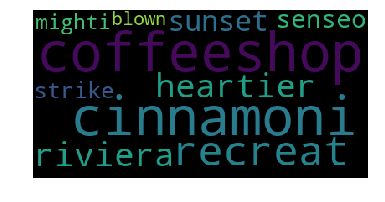

****************
cluster 1


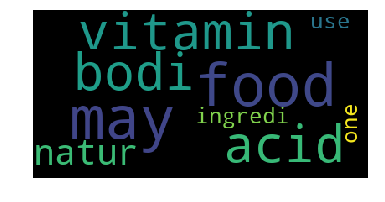

****************
cluster 2


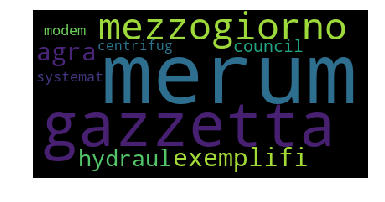

****************
cluster 3


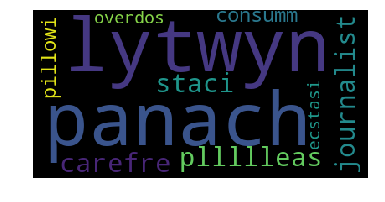

****************
cluster 4


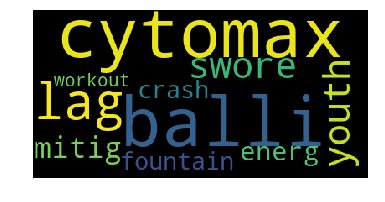

****************
cluster 5


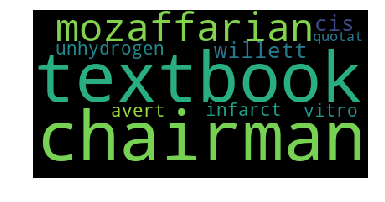

****************
cluster 6


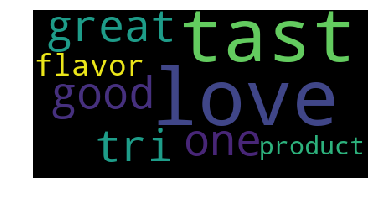

****************
cluster 7


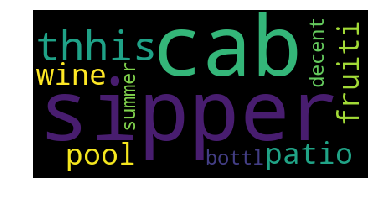

****************
cluster 8


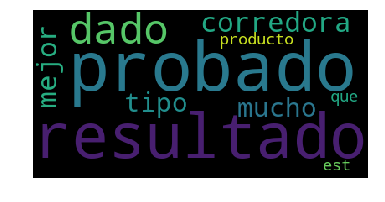

****************
cluster 9


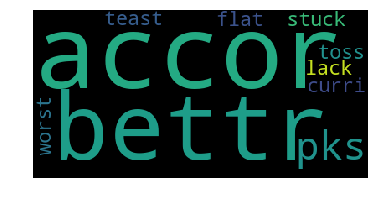

****************
cluster 10


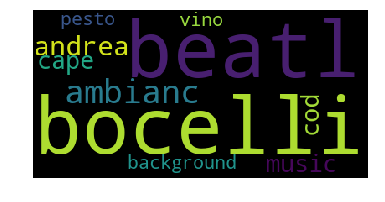

****************
cluster 11


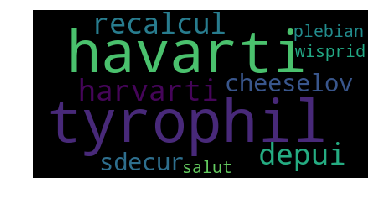

****************
cluster 12


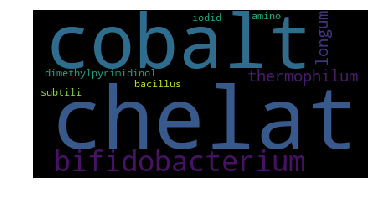

****************
cluster 13


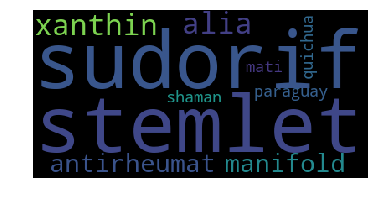

****************
cluster 14


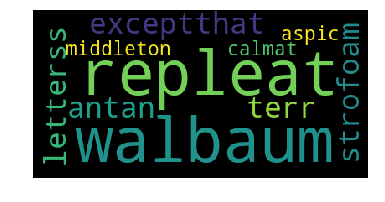

****************
cluster 15


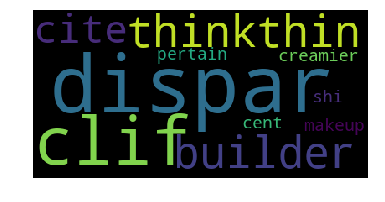

****************
cluster 16


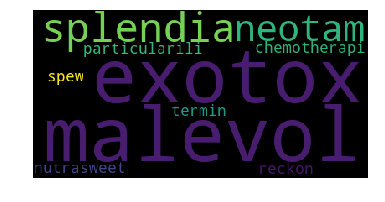

****************
cluster 17


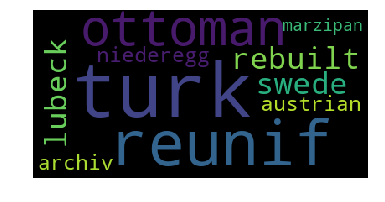

****************
cluster 18


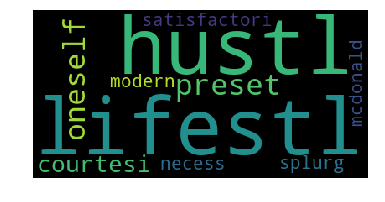

****************
cluster 19


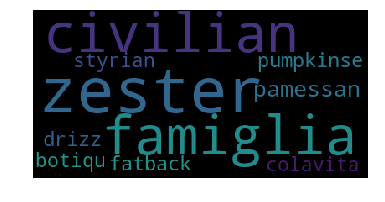

****************


In [9]:
centroids=kmeans.cluster_centers_.argsort()[:,::-1]
li=[]
for i in range(20):
    t=i
    print("cluster %d" %t)
    for j in centroids[i,:10]:
        #print("%s" %tfidf_features[j])
        li.append(bow_features[j])
    # plot the WordCloud image  
    #convert list to string and generate
    unique_string=(" ").join(li)
    wordcloud = WordCloud().generate(unique_string)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    li=[]
    print("****************")

<h2> Applying K-Means Clustering on TFIDF</h2>

In [10]:
import pickle
with open('train_tfidf.pickle', 'rb') as f:
    x_tfidf=pickle.load(f)
with open('test_tfidf.pickle','rb') as f:
    test_tfidf=pickle.load(f)

In [11]:
import pickle
with open('y_train_tfidf.pickle', 'rb') as f:
    y_tfidf=pickle.load(f)
with open('y_test_tfidf.pickle','rb') as f:
    y_test_tfidf=pickle.load(f)

In [12]:
from sklearn.preprocessing import normalize
#normalising train and test datasets
x_tfidf = normalize(x_tfidf, axis=0)
test_tfidf = normalize(test_tfidf, axis=0)

In [15]:
from sklearn.cluster import KMeans
k_set=[3,5,7,10,15,20]
inertia_set=[]
#loss=[]
for k in k_set:
    kmeans=KMeans(k)
    kmeans=kmeans.fit(x_tfidf)
    #loss.append(kmeans.inertia_)
    inertia_set.append(kmeans.inertia_)

Text(0.5,1,'Elbow method Plot for kMeans')

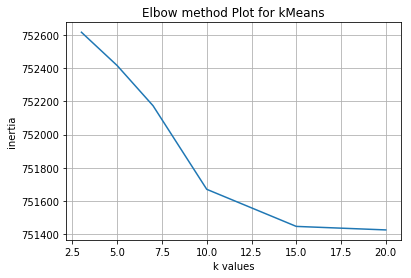

In [16]:
plt.plot(k_set,inertia_set)
plt.xlabel('k values')
plt.ylabel('inertia')
plt.grid()
plt.title('Elbow method Plot for kMeans')

In [20]:
#for finding the optimal k
optimal_k = k_set[inertia_set.index(min(inertia_set))]
print(optimal_k)
print(min(inertia_set))

20
751424.1676582029


In [21]:
from sklearn.cluster import KMeans
kmeans=KMeans(20)
kmeans=kmeans.fit(x_tfidf)

<h3>Wordclouds of clusters obtained after applying k-means on TFIDF </h3>

In [22]:
#feature importance
with open('tfidf_features.pickle','rb') as f:
    tfidf_features=pickle.load(f)

cluster 0


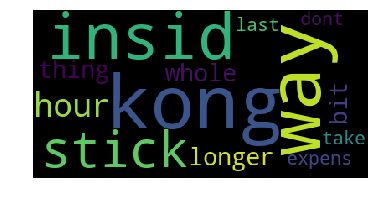

****************
cluster 1


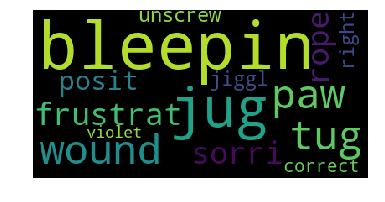

****************
cluster 2


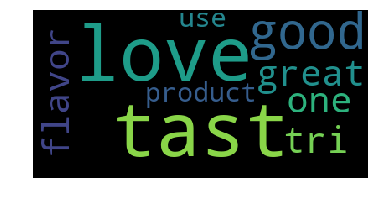

****************
cluster 3


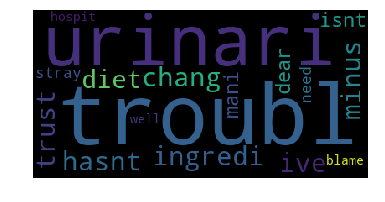

****************
cluster 4


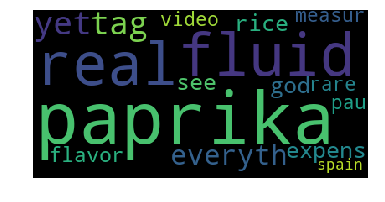

****************
cluster 5


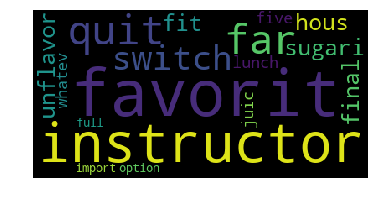

****************
cluster 6


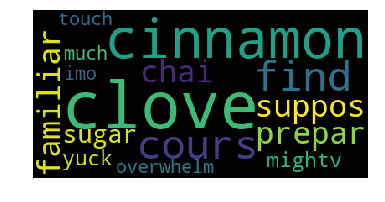

****************
cluster 7


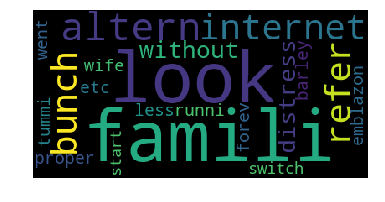

****************
cluster 8


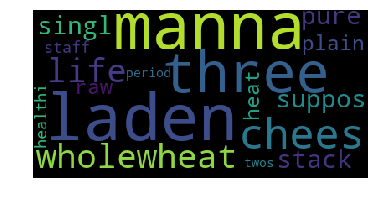

****************
cluster 9


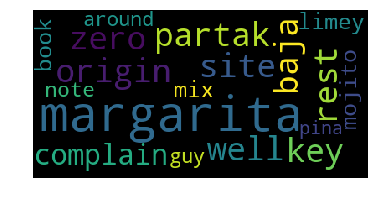

****************
cluster 10


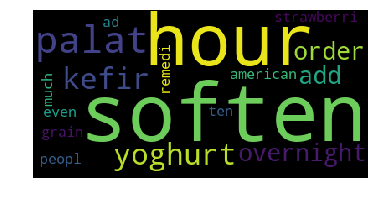

****************
cluster 11


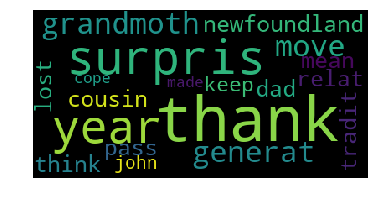

****************
cluster 12


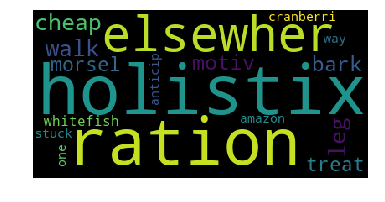

****************
cluster 13


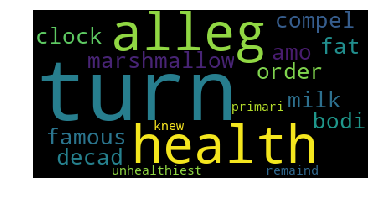

****************
cluster 14


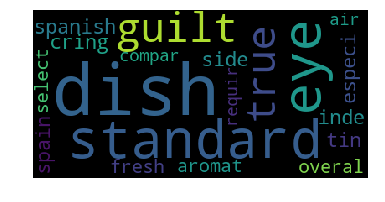

****************
cluster 15


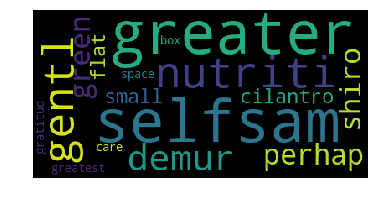

****************
cluster 16


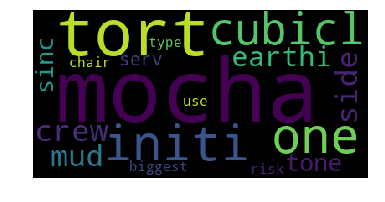

****************
cluster 17


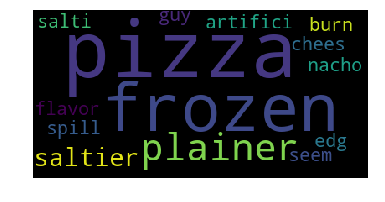

****************
cluster 18


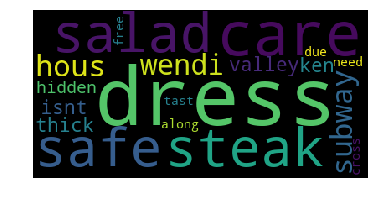

****************
cluster 19


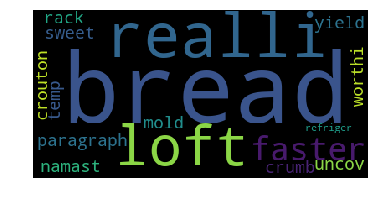

****************


In [24]:
centroids=kmeans.cluster_centers_.argsort()[:,::-1]
li=[]
for i in range(20):
    t=i
    print("cluster %d" %t)
    for j in centroids[i,:10]:
        #print("%s" %tfidf_features[j])
        li.append(tfidf_features[j])
    # plot the WordCloud image  
    #convert list to string and generate
    unique_string=(" ").join(li)
    wordcloud = WordCloud().generate(unique_string)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    li=[]
    print("****************")

||k|loss|
|---|---|---|
|Bow|20|2657787.2728719465|
|TF-IDF|20|751424.1676582029|

<h3>Applying K-Means Clustering on AVG W2V</h3>

In [25]:
import pickle
with open('train_avgw2v.pickle', 'rb') as f:
    x_avgw2v=pickle.load(f)
with open('test_avgw2v.pickle','rb') as f:
    test_avgw2v=pickle.load(f)

In [26]:
#normalizing
x_avgw2v=normalize(x_avgw2v,axis=0)

In [27]:
from sklearn.cluster import KMeans
k_set=[3,5,7,10,15,20]
inertia_set=[]
#loss=[]
for k in k_set:
    kmeans=KMeans(k)
    kmeans=kmeans.fit(x_avgw2v)
    #loss.append(kmeans.inertia_)
    inertia_set.append(kmeans.inertia_)

Text(0.5,1,'Elbow method Plot for kMeans')

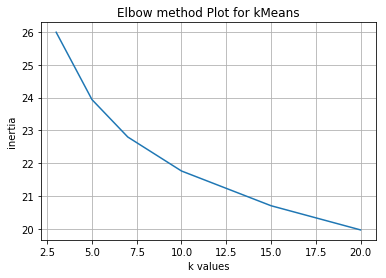

In [28]:
plt.plot(k_set,inertia_set)
plt.xlabel('k values')
plt.ylabel('inertia')
plt.grid()
plt.title('Elbow method Plot for kMeans')

In [34]:
from sklearn.cluster import KMeans
#with optimal value training the data
kmeans=KMeans(20)
kmeans=kmeans.fit(x_avgw2v)

<h3>Wordclouds of clusters obtained after applying k-means on AVG W2V </h3>

In [35]:
#feature importance
with open('avg_w2v_features.pickle','rb') as f:
    avg_w2v_features=pickle.load(f)

In [36]:
print(len(avg_w2v_features))

16089


cluster 0


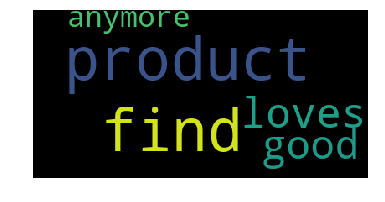

****************
cluster 1


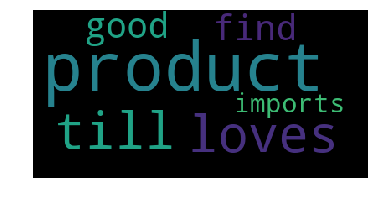

****************
cluster 2


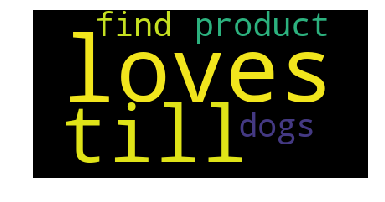

****************
cluster 3


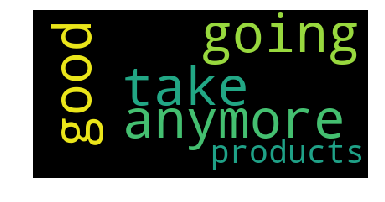

****************
cluster 4


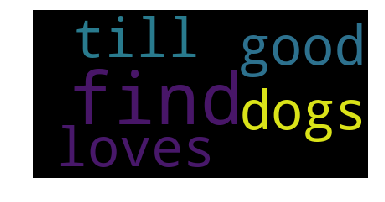

****************
cluster 5


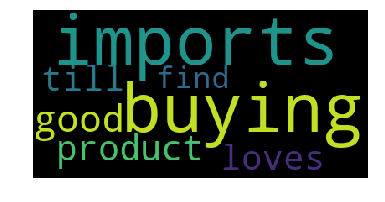

****************
cluster 6


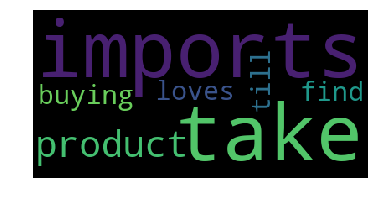

****************
cluster 7


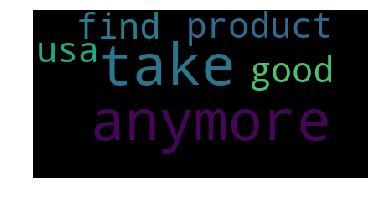

****************
cluster 8


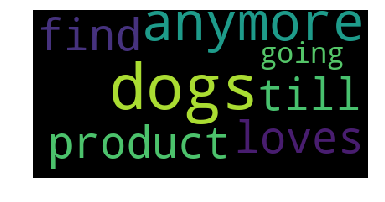

****************
cluster 9


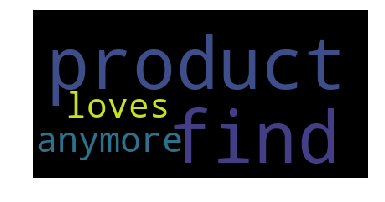

****************
cluster 10


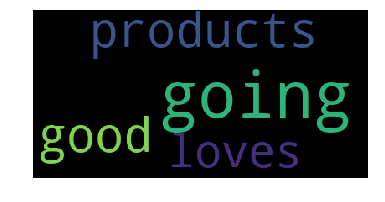

****************
cluster 11


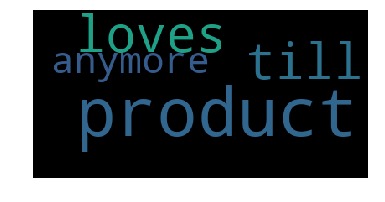

****************
cluster 12


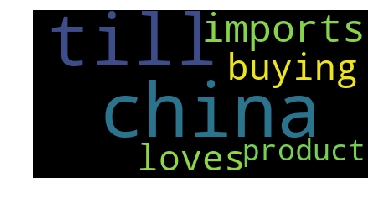

****************
cluster 13


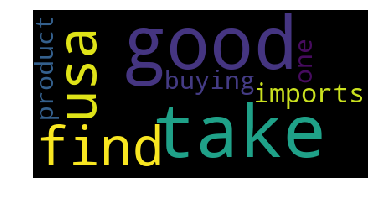

****************
cluster 14


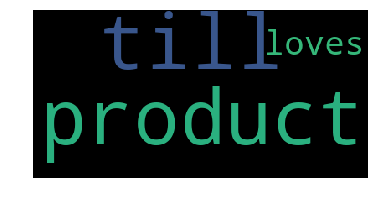

****************
cluster 15


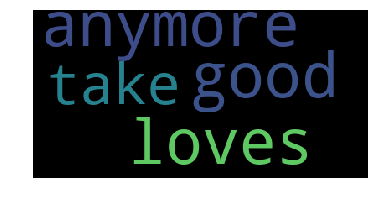

****************
cluster 16


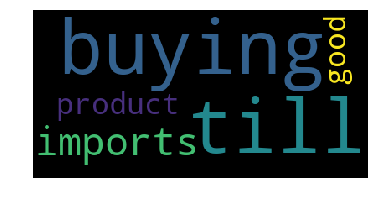

****************
cluster 17


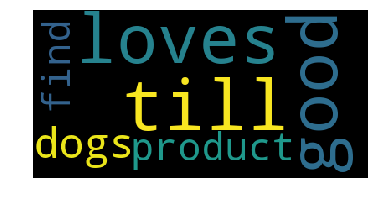

****************
cluster 18


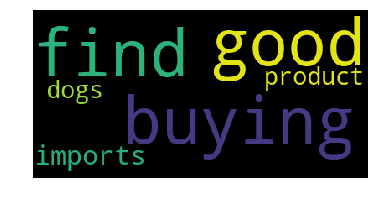

****************
cluster 19


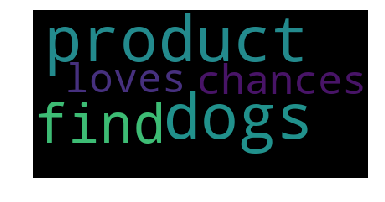

****************


In [38]:
centroids=kmeans.cluster_centers_.argsort()[:,::-1]
li=[]
for i in range(20):
    t=i
    print("cluster %d" %t)
    for j in centroids[i,:10]:
        #print("%s" %tfidf_features[j])
        li.append(avg_w2v_features[j])
    # plot the WordCloud image  
    #convert list to string and generate
    unique_string=(" ").join(li)
    wordcloud = WordCloud().generate(unique_string)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    li=[]
    print("****************")

<h3>Applying K-Means Clustering on TFIDF W2V</h3>

In [2]:
import pickle
with open('x_train_tfidf_w2v.pickle', 'rb') as f:
    train_tfidf_w2v=pickle.load(f)
with open('x_test_tfidf_w2v.pickle','rb') as f:
    test_tfidf_w2v=pickle.load(f)

In [3]:
import pickle
with open('y_train_tfidf_w2v.pickle', 'rb') as f:
    y_train=pickle.load(f)
with open('y_test_tfidf_w2v.pickle','rb') as f:
    y_test=pickle.load(f)

In [4]:
with open('features.pickle','rb') as f:
    features=pickle.load(f)

In [5]:
from sklearn.preprocessing import normalize
#normalising train and test datasets
x_train_tfidf_w2v = normalize(train_tfidf_w2v, axis=0)
x_test_tfidf_w2v = normalize(test_tfidf_w2v, axis=0)

In [7]:
from sklearn.cluster import KMeans
k_set=[3,5,7,10,15,20]
inertia_set=[]
#loss=[]
for k in k_set:
    kmeans=KMeans(k)
    kmeans=kmeans.fit(x_train_tfidf_w2v)
    #loss.append(kmeans.inertia_)
    inertia_set.append(kmeans.inertia_)

Text(0.5,1,'Elbow method Plot for kMeans')

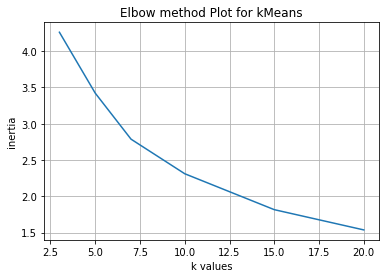

In [8]:
plt.plot(k_set,inertia_set)
plt.xlabel('k values')
plt.ylabel('inertia')
plt.grid()
plt.title('Elbow method Plot for kMeans')

<h3>Wordclouds of clusters obtained after applying k-means on TFIDF W2V </h3>

cluster 0


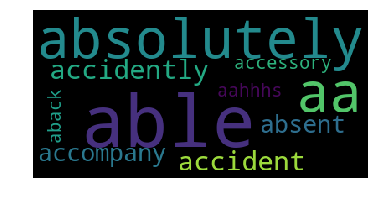

****************
cluster 1


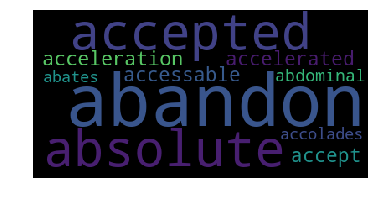

****************
cluster 2


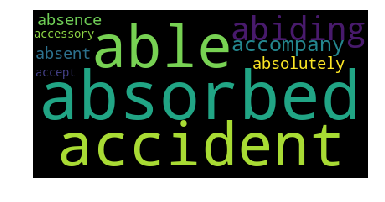

****************
cluster 3


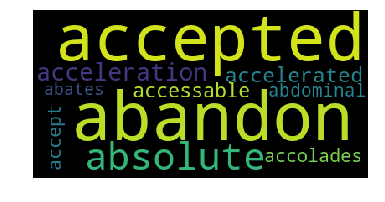

****************
cluster 4


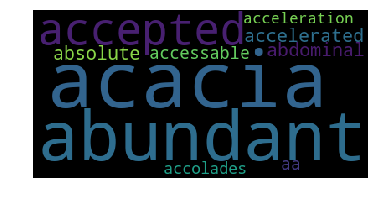

****************
cluster 5


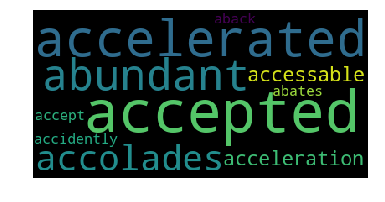

****************
cluster 6


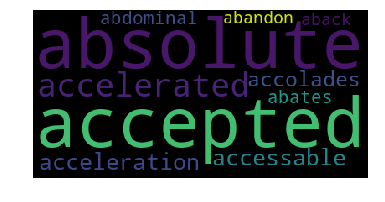

****************
cluster 7


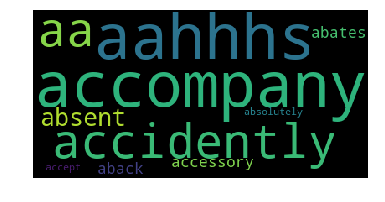

****************
cluster 8


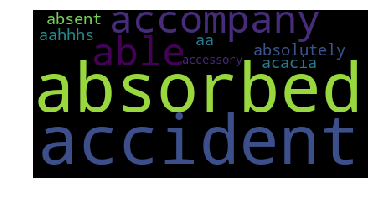

****************
cluster 9


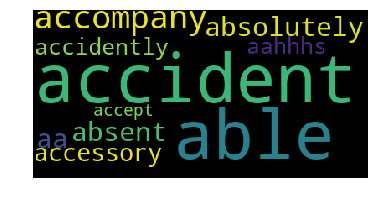

****************
cluster 10


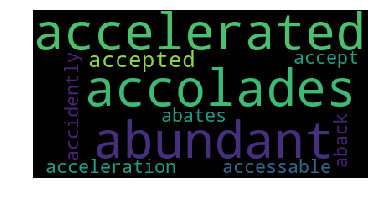

****************
cluster 11


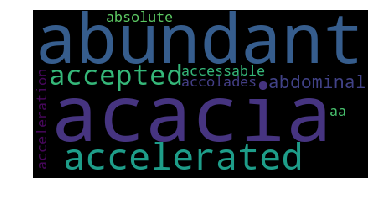

****************
cluster 12


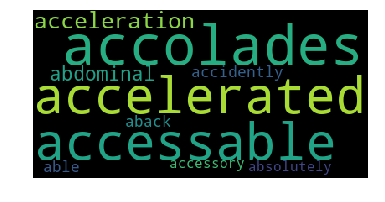

****************
cluster 13


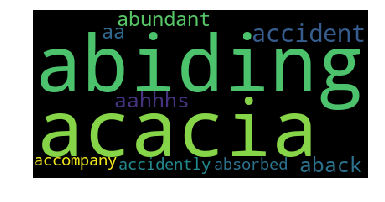

****************
cluster 14


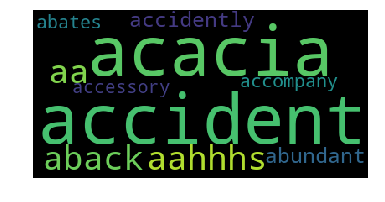

****************
cluster 15


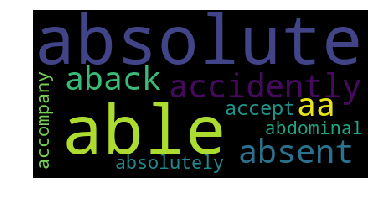

****************
cluster 16


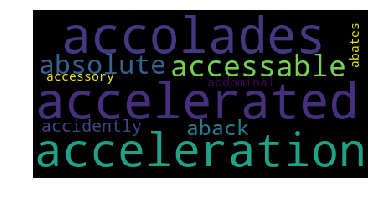

****************
cluster 17


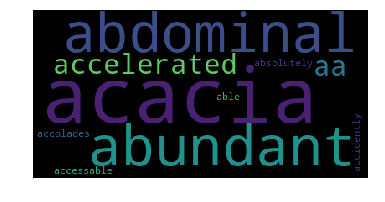

****************
cluster 18


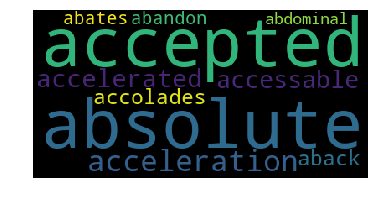

****************
cluster 19


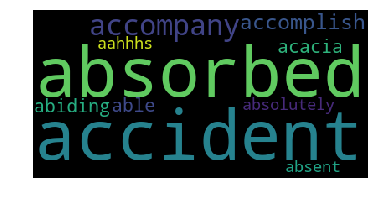

****************


In [10]:
centroids=kmeans.cluster_centers_.argsort()[:,::-1]
li=[]
for i in range(20):
    t=i
    print("cluster %d" %t)
    for j in centroids[i,:10]:
        #print("%s" %tfidf_features[j])
        li.append(features[j])
    # plot the WordCloud image  
    #convert list to string and generate
    unique_string=(" ").join(li)
    wordcloud = WordCloud().generate(unique_string)
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    li=[]
    print("****************")

<b>Observation:</b></br>K-means on Bag of words and tfidf is better than k-means on average word2vec and tfidf word2vec
    